In [ ]:
import pandas as pd
from wordcloud import WordCloud #for visualizing the words
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize import word_tokenize as wt
from nltk.corpus import stopwords
!pip install autocorrect
import re
from nltk.stem import PorterStemmer
stemm=PorterStemmer()
from autocorrect import Speller
spell=Speller()
from tqdm import tqdm

     |████████████████████████████████| 624kB 4.0MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.5.0-cp37-none-any.whl size=621854 sha256=24a5507b2256c054cf00eba2936503bd1bef48d81d4d106d0192107fd3e20742
  Stored in directory: /root/.cache/pip/wheels/1f/71/da/4a15028d25fbd5fb97fb76c5f76f0ad86f0caa69394dd7cfa7
Successfully built autocorrect


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/pydeveloperashish/Spam-Classifier-using-naive-bayes/main/spam.csv')

In [ ]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.rename(columns={'v1':'spam/ham','v2':'messages'},inplace=True)
data.head()

,spam/ham,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


*Visualizing the SPAM WORDS:*

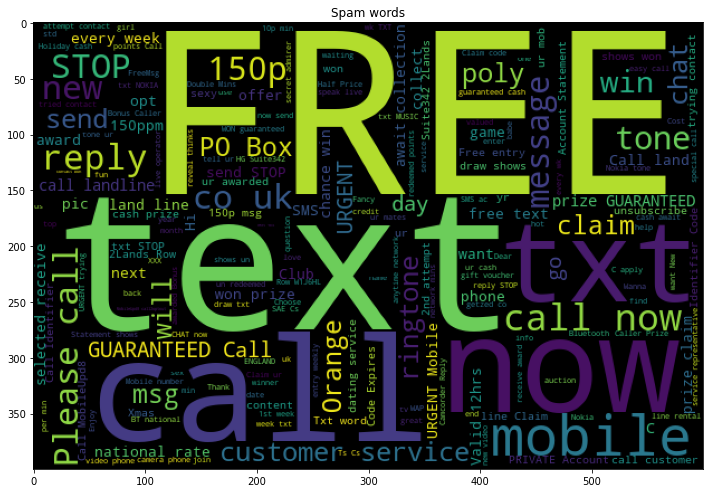

In [ ]:
#create a list containg all the words of the 'messages' column that is spam
spam_words=' '.join(list(data[data['spam/ham']=='spam']['messages']))
wc_spam=WordCloud(width=600,height=400).generate(spam_words)
plt.figure(figsize=(12,10))
plt.title('Spam words')
plt.imshow(wc_spam)
plt.show()

*Visualizing the HAM words:*

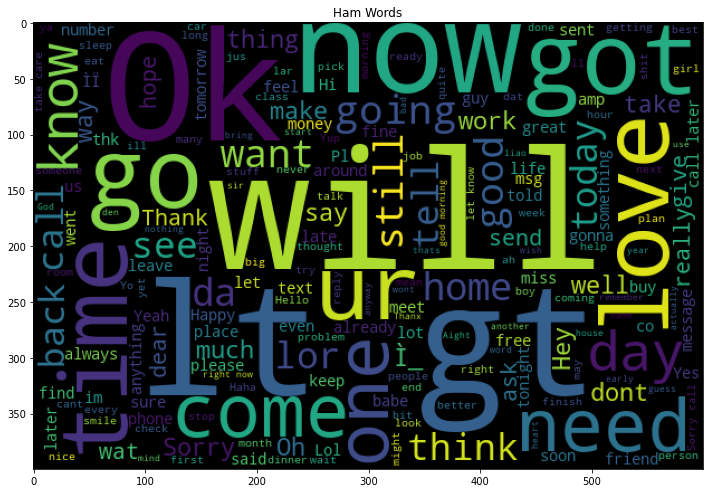

In [ ]:
ham_words=' '.join(list(data[data['spam/ham']=='ham']['messages']))
wc_ham=WordCloud(width=600,height=400).generate(ham_words)
plt.figure(figsize=(12,10))
plt.title('Ham Words')
plt.imshow(wc_ham)
plt.show()

## **NLP PREPROCESSING**

*i)Tokenizing the sentences:*

In [ ]:
#example:
s='my name is gayu'
print(wt(s))

['my', 'name', 'is', 'gayu']


*ii)Stopwords:common words that dont make much sense and hence need to be removed beacuse they wont be needed for the model to learn:*

In [ ]:
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
stopw=set(stopwords.words('english'))

*iii)Stemming/Lemmatization:Converts words into root words.eg:playing-->play,plays-->play,played-->play and so on:*

*iv)Spell Correction*

*v)Removing non-alphabetical characters*

In [ ]:
data.shape

(5572, 2)

In [ ]:
new_data=[]
for i in tqdm(range(data.shape[0])): #Start iterating through every row
  line=data.iloc[i,1] #to access the 'i'th row of column1('messages')
  #remove all the non-alphabetical characters
  line=re.sub('[^A-Za-z]',' ',line)
  #convert all the words to lowercase
  line=line.lower()
  #apply tokenization
  tokenized_line=wt(line)
  #applying stemming and spell correction
  preprocessed_words=[]
  for j in tokenized_line:
    if j not in stopw:
      preprocessed_words.append(spell(stemm.stem(j))) #stemming and correcting any spelling errors
  #now join these words with spaces to form the sentence of that row containing only the words that are required
  final_line=' '.join(preprocessed_words)
  #finally append the fully preprocessed sentence to the list 'new_data'
  new_data.append(final_line) 

100%|██████████| 5572/5572 [03:34<00:00, 26.01it/s]


*One hot encoding the labels:*

In [ ]:
data['spam/ham']=data['spam/ham'].apply(lambda x:1 if x=='spam' else 0)
data.head()

,spam/ham,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


*Splitting into training and testing set:*

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(new_data,data['spam/ham'],test_size=0.2)

## ***Vectorization***

In [ ]:
new_data[:5]

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though']

In [ ]:
data.head()

,spam/ham,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
matrix=CountVectorizer()

In [ ]:
#convert to vectors:
train_Xv=matrix.fit_transform(train_X).toarray()
test_Xv=matrix.transform(test_X).toarray() #sparse matrix is to be converted to array

In [ ]:
train_Xv[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
test_Xv[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## ***Training the model***

In [ ]:
from sklearn.naive_bayes import GaussianNB #best suited for NLP task
nb_model=GaussianNB()

In [ ]:
nb_model.fit(train_Xv,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
pred_y=nb_model.predict(test_Xv)
pred_y

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
test_y

4426    0
213     0
4926    0
2754    0
3885    0
       ..
3216    0
2011    0
2294    1
1582    0
4572    1
Name: spam/ham, Length: 1115, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(test_y,pred_y)*100

84.12556053811659

In [ ]:
confusion_matrix(test_y,pred_y)

array([[824, 159],
       [ 18, 114]])